# Demo notebook

In [1]:
# Import basic libraries
from palmerpenguins import load_penguins
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")
import time
from sklearn.preprocessing import LabelEncoder
from torch.optim import Adam
import torch
import torch.nn as nn

In [2]:
# Import personalized libraries
from fuzz.src.capacity import *
from fuzz.src.choquet import *
from fuzz.src.norm import *
from fuzz.src.knn import *
from fuzz.src.sim import S1, S2, S3
from fuzz.src.nca import NCA
from fuzz.optim import *
from fuzz.utils import *
from fuzz.eval import leave_one_out
from fuzz.dataloader import *

## Random test

In [27]:
data, labels = dynamic_generate_positive_gaussian_data(
    dim=4,
    nb_classes=3,
    nb_points_per_class=100,
    seed=42
)
# data = batch_norm(data)
data[:5]

array([[5.47648602, 5.132005  , 5.78871584, 5.7971066 ],
       [5.52304337, 5.67641759, 4.64357245, 4.23150621],
       [5.7253982 , 5.44109167, 4.15447897, 5.95592589],
       [4.85694868, 4.8696087 , 5.15355661, 4.28429092],
       [5.2084727 , 4.51062928, 3.97804018, 4.49813173]])

In [28]:
choquet = Choquet(X=data[0], mu=generate_capacity(enumerate_permute_unit(data[0])))
print(choquet.choquet)
# choquet.Choquet_classic(verbose=True)

5.515927431265956


In [5]:
mu=generate_capacity(enumerate_permute_unit(data[0]))
sim = S1(X=data[0], Y=data[10], mu=mu)
print(sim.score())

0.44861642371487226


In [6]:
for i in range(10):
    sim = S1(X=data[0], Y=data[i], mu=mu)
    print(sim.score())

0.9829879140227242
0.13631749705671783
0.3631454084702933
0.34187422343143625
0.040414722876863644
0.04813785531700351
0.6544513092086385
0.42951930009951955
0.8375978998893324
0.33812551766358045


In [7]:
knn = KNNFuzz(input_dimension=4, mu=mu)
knn.train(data, labels)

Leave one out avec k = 1
SimLevel1: 0.32666666666666666
SimLevel2: 0.27666666666666667
SimLevel3: 0.31333333333333335

Result in 9.2997 seconds.
Leave one out avec k = 2
SimLevel1: 0.32
SimLevel2: 0.31333333333333335
SimLevel3: 0.33

Result in 9.3100 seconds.
Leave one out avec k = 3
SimLevel1: 0.31333333333333335
SimLevel2: 0.3566666666666667
SimLevel3: 0.3433333333333333

Result in 9.1127 seconds.
Leave one out avec k = 4
SimLevel1: 0.33
SimLevel2: 0.3233333333333333
SimLevel3: 0.36333333333333334

Result in 9.2624 seconds.
Leave one out avec k = 5
SimLevel1: 0.31666666666666665
SimLevel2: 0.31
SimLevel3: 0.31333333333333335

Result in 9.0179 seconds.
Leave one out avec k = 6
SimLevel1: 0.29333333333333333
SimLevel2: 0.3233333333333333
SimLevel3: 0.33

Result in 9.1775 seconds.
Leave one out avec k = 7
SimLevel1: 0.27
SimLevel2: 0.27
SimLevel3: 0.32

Result in 9.0543 seconds.
Leave one out avec k = 8
SimLevel1: 0.31333333333333335
SimLevel2: 0.3333333333333333
SimLevel3: 0.3266666666

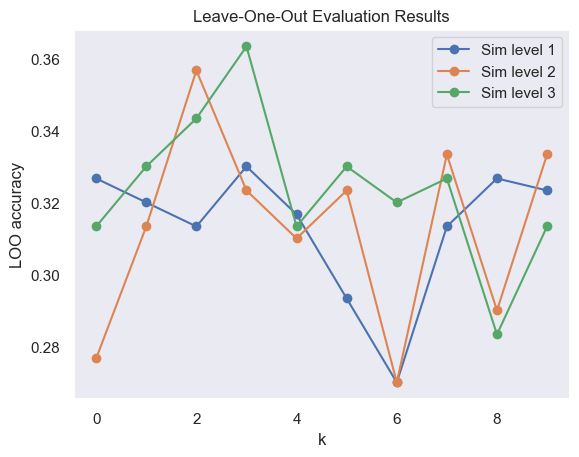

In [8]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data, labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data, labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data, labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

In [ ]:
data

Epoch 1/150, Loss: -51.500000, Smoothed: -51.500000, LR: 0.001000
Epoch 5/150, Loss: -49.000000, Smoothed: -50.762650, LR: 0.000997
Epoch 10/150, Loss: -53.000000, Smoothed: -50.479482, LR: 0.000989
Epoch 15/150, Loss: -44.000000, Smoothed: -50.314839, LR: 0.000976
Epoch 20/150, Loss: -51.000000, Smoothed: -50.289555, LR: 0.000957
Epoch 25/150, Loss: -51.500000, Smoothed: -50.436809, LR: 0.000934
Epoch 30/150, Loss: -49.000000, Smoothed: -50.397331, LR: 0.000905
Epoch 35/150, Loss: -46.500000, Smoothed: -49.907300, LR: 0.000873
Epoch 40/150, Loss: -55.000000, Smoothed: -51.039712, LR: 0.000836
Epoch 45/150, Loss: -51.000000, Smoothed: -50.889439, LR: 0.000796
Epoch 50/150, Loss: -49.500000, Smoothed: -50.748580, LR: 0.000752
Epoch 55/150, Loss: -50.000000, Smoothed: -50.549354, LR: 0.000706
Epoch 60/150, Loss: -51.000000, Smoothed: -49.547338, LR: 0.000658
Epoch 65/150, Loss: -55.000000, Smoothed: -50.095818, LR: 0.000608
Epoch 70/150, Loss: -51.000000, Smoothed: -50.021579, LR: 0.0005

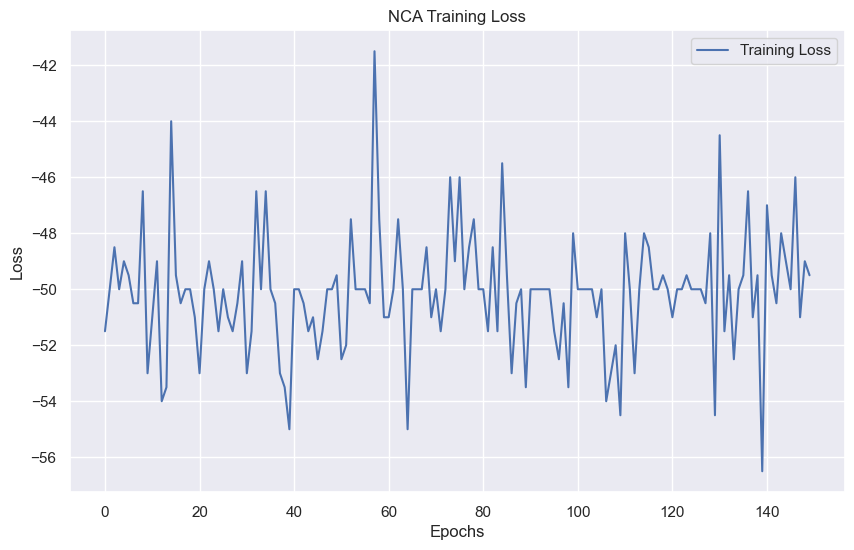

In [8]:
num_epochs = 150  # Increased epochs since convergence wasn't reached
nca = NCA(input_dim=data.shape[1], output_dim=2)
nca.train()
knn = KNNFuzz(input_dimension=2,mu=mu, k=1, sim=S1)



# Lower learning rate, add AMSGrad option
optimizer = torch.optim.Adam(nca.parameters(), lr=1e-3, weight_decay=1e-4, amsgrad=True)

# Use a more smooth learning rate schedule
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs, eta_min=1e-5)

# Increase batch size for stability
batch_size = 256  # Adjust based on your dataset size and memory constraints

# losses
losses = []
running_loss = 0.0  # For smoothed loss reporting

# Add gradient clipping
max_grad_norm = 1.0

for i in range(num_epochs):
    # Shuffle data at each epoch
    shuffle_idx = torch.randperm(len(data))
    shuffled_data = data[shuffle_idx]
    shuffled_labels = labels[shuffle_idx]
    
    epoch_losses = []
    
    # Process in batches
    for start_idx in range(0, len(shuffled_data), batch_size):
        end_idx = min(start_idx + batch_size, len(shuffled_data))
        batch_data = shuffled_data[start_idx:end_idx]
        batch_labels = shuffled_labels[start_idx:end_idx]
        
        # Forward pass
        Z = nca(batch_data)
        Z_numpy = Z.detach().numpy()
        
        # Train KNN on the current batch projection
        knn.train(Z_numpy, batch_labels)
        
        # Get predictions for loss calculation
        pred = [knn.predict(Z_numpy[i]) for i in range(len(Z_numpy))]
        
        # Calculate loss
        loss = nca.loss(Z, batch_labels, pred)
        epoch_losses.append(loss.item())
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        
        # Gradient clipping to prevent extreme updates
        torch.nn.utils.clip_grad_norm_(nca.parameters(), max_grad_norm)
        
        optimizer.step()
    
    # Calculate average loss for this epoch
    avg_epoch_loss = sum(epoch_losses) / len(epoch_losses)
    losses.append(avg_epoch_loss)
    
    # Exponential moving average for smoother loss reporting
    if i == 0:
        running_loss = avg_epoch_loss
    else:
        running_loss = 0.9 * running_loss + 0.1 * avg_epoch_loss
    
    # Update learning rate
    scheduler.step()
    
    # Print both actual and smoothed loss
    if (i+1) % 5 == 0 or i == 0:
        print(f"Epoch {i+1}/{num_epochs}, Loss: {avg_epoch_loss:.6f}, Smoothed: {running_loss:.6f}, LR: {scheduler.get_last_lr()[0]:.6f}")

# Visualization code for monitoring loss
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(range(len(losses)), losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('NCA Training Loss')
plt.grid(True)
plt.legend()
plt.savefig('nca_training_loss.png')
plt.show()

In [205]:
class NCAFuzzKNN(KNNFuzz):
    """
    KNNFuzz classifier enhanced with NCA for metric learning.
    This class learns a transformation matrix that optimizes
    fuzzy similarity-based classification.
    """
    def __init__(self, input_dimension: int, mu: List[Capacity], k: int = 3, 
                 output_dimension: int = None, sim: FuzzSIM = S1):
        """
        Initialize NCA-enhanced Fuzzy KNN.
        
        Parameters:
        -----------
        input_dimension : int
            Dimension of input features
        mu : List[Capacity]
            List of capacity functions for fuzzy similarity
        k : int
            Number of neighbors to consider
        output_dimension : int
            Dimension of the transformed space (defaults to input_dimension)
        sim : FuzzSIM
            Fuzzy similarity measure to use (S1, S2, S3, etc.)
        """
        super().__init__(input_dimension=input_dimension, mu=mu, k=k, sim=sim)
        
        # Set output dimension (for dimensionality reduction if needed)
        if output_dimension is None:
            output_dimension = input_dimension
        self.output_dimension = output_dimension
        
        # Initialize NCA model
        self.nca = torch.nn.Module()
        # Initialize A with small random values
        self.nca.A = torch.nn.Parameter(torch.randn(output_dimension, input_dimension) * 0.01)
        
        # Store transformed data
        self.transformed_desc_set = None

    def transform(self, x):
        """
        Transform input data using the learned transformation matrix.
        
        Parameters:
        -----------
        x : np.ndarray or torch.Tensor
            Input data to transform
            
        Returns:
        --------
        np.ndarray
            Transformed data
        """
        if not isinstance(x, torch.Tensor):
            x_tensor = torch.tensor(x, dtype=torch.float32)
        else:
            x_tensor = x
            
        # Apply the transformation: x -> x * A^T
        transformed = torch.matmul(x_tensor, self.nca.A.t())
        return transformed
    
    def compute_pij(self, transformed_data: np.ndarray, mu: List[Capacity]) -> np.ndarray:
        """
        Compute the stochastic neighbor probabilities p_ij based on fuzzy similarities.
        
        Parameters:
        -----------
        transformed_data : torch.Tensor
            Data in the transformed space
        mu : List[Capacity]
            List of capacity functions for fuzzy similarity

        Returns:
        --------
        np.ndarray
            Stochastic neighbor probability matrix
        """
        n = transformed_data.shape[0]

        # Convert to numpy if not already
        if not isinstance(transformed_data, np.ndarray):
            transformed_data = transformed_data.detach().numpy()

        # Compute pairwise similarities
        sim_matrix = np.zeros((n, n))
        for i in range(n):
            for j in range(n):
                if i != j:  # Exclude self-similarity
                    sim_matrix[i, j] = S1(transformed_data[i], transformed_data[j], mu).score()

        # Convert to torch tensor
        sim_tensor = torch.tensor(sim_matrix, dtype=torch.float32)

        # Apply softmax to get probabilities
        # We need to handle the diagonal separately (set to 0)
        mask = torch.eye(n, dtype=torch.bool)
        sim_tensor.masked_fill_(mask, float('-inf'))  # Set diagonal to -inf

        # Apply softmax row-wise
        pij = torch.softmax(sim_tensor, dim=1)
        
        return pij
    
    def nca_loss(self, x: torch.Tensor, mu: List[Capacity], labels: torch.Tensor) -> torch.Tensor:
        """
        Compute the NCA loss based on the transformed data and fuzzy similarities.
        
        Parameters:
        -----------
        x : torch.Tensor
            Input data
        mu : List[Capacity]
            List of capacity functions for fuzzy similarity
        labels : torch.Tensor
            Corresponding labels for the input data
            
        Returns:
        --------
        torch.Tensor
            Computed NCA loss
        """
        epsilon: float = 1e-8

        # Transform the data     
        transformed = torch.matmul(x, self.nca.A.t())
        # Normalize the transformed data
        # Calculate mean and std along the batch dimension
        mean = torch.mean(transformed, dim=0, keepdim=True)
        std = torch.std(transformed, dim=0, keepdim=True) + epsilon
        transformed = (transformed - mean) / std


        # Compute p_ij (probability that i selects j as its neighbor)
        pij = self.compute_pij(transformed, mu)

        # Create a mask for same-class examples
        n = x.size(0)
        same_class = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
        mask = torch.eye(n, dtype=torch.bool)
        same_class.masked_fill_(mask, 0)  # Exclude self-similarity

        # Sum p_ij over all j in the same class as i
        pi = (pij * same_class).sum(dim=1)  # shape: [n]
        
        # Maximize sum(pi) ⇒ minimize -sum(pi)
        loss = -torch.sum(pi)
        
        return loss
    

    def train(
            self, 
            desc_set: np.ndarray,
            label_set: np.ndarray,
            mu: List[Capacity],
            num_epochs: int = 100,
            learning_rate: float = 0.01,
            batch_size: int = 32,
    ):
        """
        Train the NCA-enhanced KNNFuzz model.
        First learn the optimal transformation, then store the transformed data.
        
        Parameters:
        -----------
        desc_set : np.ndarray
            Training data descriptions
        label_set : np.ndarray
            Training data labels
        learning_rate : float
            Learning rate for optimization
        num_epochs : int
            Number of training epochs
        batch_size : int
            Batch size for mini-batch training (None for full batch)
        """
        self.desc_set = desc_set
        self.label_set = label_set

        # Convert to torch tensors
        if isinstance(desc_set, np.ndarray):
            desc_set = torch.tensor(desc_set, dtype=torch.float32)
        if isinstance(label_set, np.ndarray):
            label_set = torch.tensor(label_set, dtype=torch.long)

        # Initialize optimizer
        optimizer = torch.optim.Adam([self.nca.A], lr=learning_rate)

        n_samples = len(desc_set)        
        # mini-batch or full batch
        if batch_size is None:
            batch_size = n_samples

        # Train the model
        losses = []
        
        for epoch in range(num_epochs):
            epoch_loss = 0

            # Shuffle the data for mini-batch training
            indices = torch.randperm(n_samples)

            # Mini-batch training
            for start_idx in range(0, n_samples, batch_size):
                # Get mini-batch indices
                batch_indices = indices[start_idx:min(start_idx + batch_size, n_samples)]
                
                # Get batch data
                batch_x = desc_set[batch_indices]
                batch_y = label_set[batch_indices]
                
                # Zero the gradients
                optimizer.zero_grad()
                
                # Compute loss
                loss = self.nca_loss(x=batch_x, labels=batch_y, mu=mu)
                
                # Backward pass and optimization
                loss.backward()
                optimizer.step()
                
                epoch_loss += loss.item() * len(batch_indices)
            
            # Average loss for the epoch
            avg_loss = epoch_loss / n_samples
            losses.append(avg_loss)
            
            # Print progress
            if (epoch + 1) % 10 == 0:
                print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")
        
        # Transform the training data using the learned transformation
        self.transformed_desc_set = self.transform(desc_set)
        
        print(f"NCA training complete. Final loss: {losses[-1]:.4f}")


In [206]:
# If your data has 3 features:
nca_fuzz_knn = NCAFuzzKNN(
    input_dimension=data.shape[1],  # Must match your data's feature count
    mu=mu,
    k=3,
    output_dimension=5,
    sim=S1
)

# Print the shapes to verify
print(f"Data shape: {data.shape}")
print(f"Model input dimension: {nca_fuzz_knn.input_dimension}")
print(f"Model A matrix shape: {nca_fuzz_knn.nca.A.shape}")

Data shape: torch.Size([300, 4])
Model input dimension: 4
Model A matrix shape: torch.Size([5, 4])


In [209]:
# Transform the data
transformed_data = nca_fuzz_knn.transform(data)
transformed_data

tensor([[0.0536, 0.0501, 0.1058, 0.1011, 0.0326],
        [0.0500, 0.0444, 0.1143, 0.1080, 0.0261],
        [0.0851, 0.0518, 0.1219, 0.0953, 0.0319],
        ...,
        [0.1655, 0.1469, 0.2970, 0.2796, 0.0792],
        [0.1690, 0.1466, 0.2931, 0.2722, 0.0861],
        [0.1513, 0.1422, 0.3223, 0.3104, 0.0787]], grad_fn=<MmBackward0>)

In [199]:
mu = generate_capacity(enumerate_permute_unit(transformed_data[0].detach().numpy()))
mu

<Axes: >

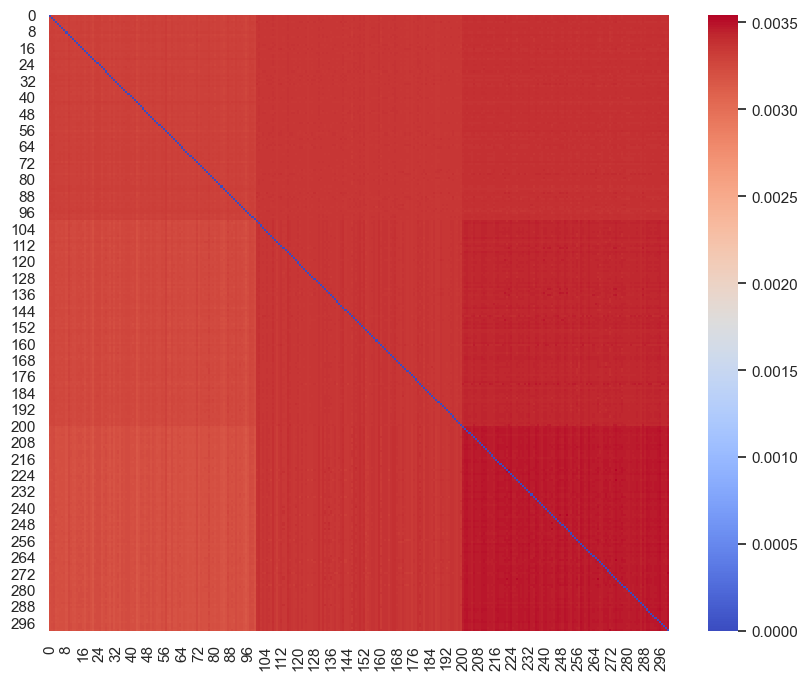

In [210]:
pij = nca_fuzz_knn.compute_pij(transformed_data, mu)
plt.figure(figsize=(10, 8))
sns.heatmap(pij, fmt=".2f", cmap='coolwarm')

### Test loss

In [153]:
transformed = torch.matmul(torch.tensor(data, dtype=torch.float32), nca_fuzz_knn.nca.A.t()).detach().numpy()
mu = generate_capacity(enumerate_permute_unit(transformed[0]))
pij = nca_fuzz_knn.compute_pij(transformed, mu)


/var/folders/p4/7wm8j7tn0n316fy23dlvdbq40000gn/T/ipykernel_82333/922203638.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  transformed = torch.matmul(torch.tensor(data, dtype=torch.float32), nca_fuzz_knn.nca.A.t()).detach().numpy()


/var/folders/p4/7wm8j7tn0n316fy23dlvdbq40000gn/T/ipykernel_82333/207458942.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  data = torch.tensor(data, dtype=torch.float32)
/var/folders/p4/7wm8j7tn0n316fy23dlvdbq40000gn/T/ipykernel_82333/207458942.py:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  labels = torch.tensor(labels, dtype=torch.long)


<Axes: >

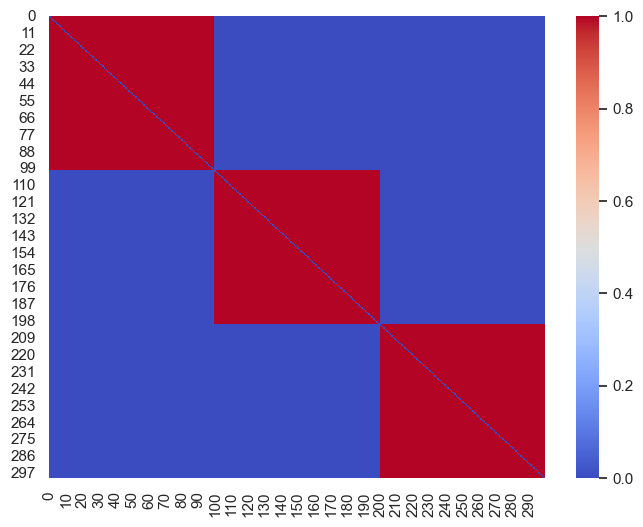

In [154]:
data = torch.tensor(data, dtype=torch.float32)
labels = torch.tensor(labels, dtype=torch.long)
n = data.size(0)
same_class = (labels.unsqueeze(1) == labels.unsqueeze(0)).float()
mask = torch.eye(n, dtype=torch.bool)
same_class.masked_fill_(mask, 0)  # Exclude self
plt.figure(figsize=(8, 6))
sns.heatmap(same_class, fmt=".2f", cmap='coolwarm')

In [155]:
# Sum p_ij over all j in the same class as i
pi = (pij * same_class).sum(dim=1)  # shape: [n]
pi.shape


torch.Size([300])

In [156]:
# Maximize sum(pi) ⇒ minimize -sum(pi)
loss = -torch.sum(pi)
print(f"Loss: {loss.item()}")

Loss: -118.9266128540039


In [190]:
nca_fuzz_knn.nca_loss(data, mu, labels)

tensor(-60.1433)

In [140]:
n = transformed_data.shape[0]
print(n)

300


In [141]:
# Compute pairwise similarities
sim_matrix = np.zeros((n, n))
print(sim_matrix.shape)

(300, 300)


In [142]:
for i in range(n):
    for j in range(n):
        if i != j:  # Exclude self-similarity
            sim_matrix[i, j] = S1(transformed_data[i], transformed_data[j], mu).score()
        else: 
            sim_matrix[i, j] = 0

<Axes: >

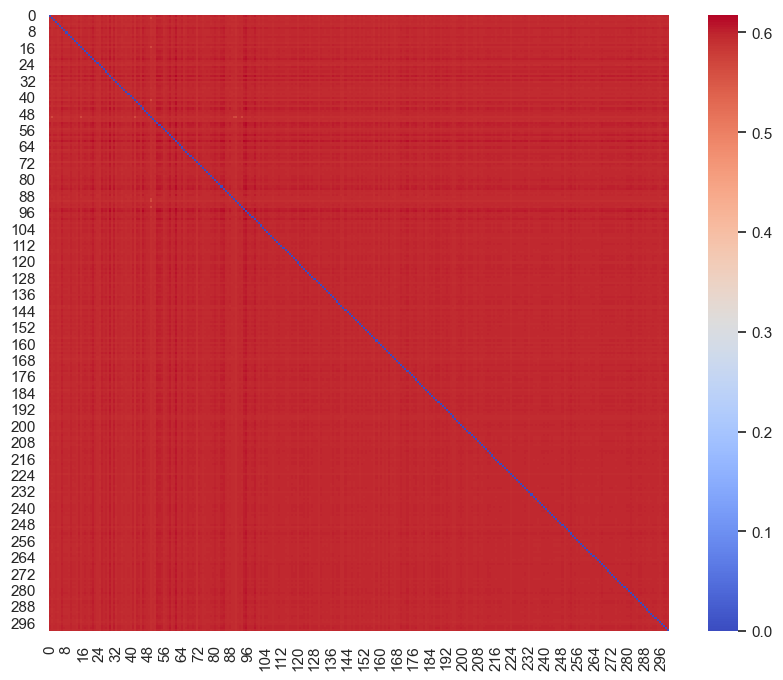

In [143]:
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, fmt=".2f", cmap='coolwarm')

In [144]:
# Convert to torch tensor
sim_tensor = torch.tensor(sim_matrix, dtype=torch.float32)

# Apply softmax to get probabilities
# We need to handle the diagonal separately (set to 0)
mask = torch.eye(n, dtype=torch.bool)
sim_tensor.masked_fill_(mask, float('-inf'))  # Set diagonal to -inf

# Apply softmax row-wise
pij = torch.softmax(sim_tensor, dim=1)

<Axes: >

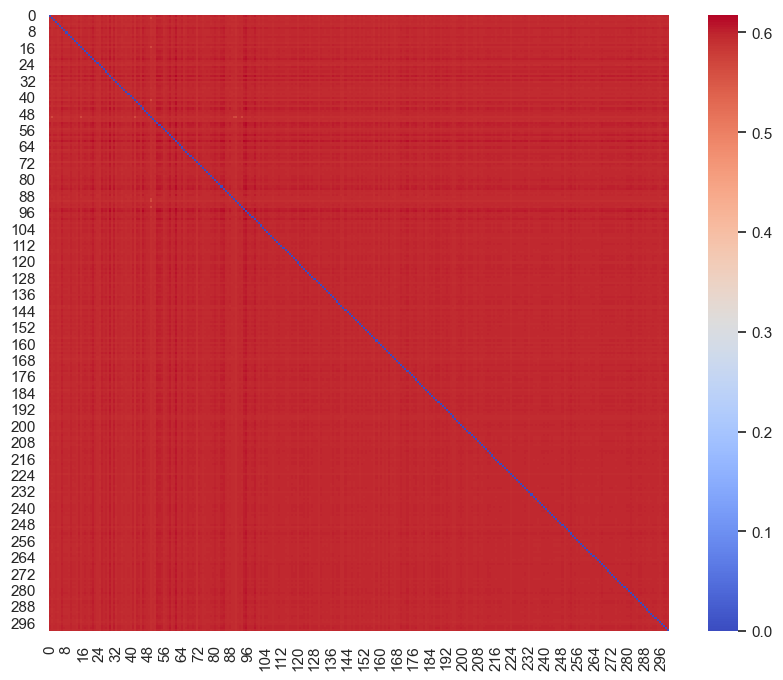

In [145]:
plt.figure(figsize=(10, 8))
sns.heatmap(sim_matrix, fmt=".2f", cmap='coolwarm')

In [204]:
nca_fuzz_knn.train(
    desc_set=data,
    label_set=labels,
    mu=mu,
    num_epochs=10,
    learning_rate=0.01,
    batch_size=32
)

RuntimeError: a view of a leaf Variable that requires grad is being used in an in-place operation.

In [9]:
# If your data has 3 features:
nca_fuzz_knn = NCAFuzzKNN(
    input_dimension=4,  # Must match your data's feature count
    mu=mu,
    k=3,
    output_dimension=5,
    sim=S1
)

# Print the shapes to verify
print(f"Data shape: {data.shape}")
print(f"Model input dimension: {nca_fuzz_knn.input_dimension}")
print(f"Model A matrix shape: {nca_fuzz_knn.nca.A.shape}")

# Then train
nca_fuzz_knn.train(
    desc_set=data,
    label_set=labels,
    learning_rate=0.01,
    num_epochs=100
)

Data shape: (300, 4)
Model input dimension: 4
Model A matrix shape: torch.Size([5, 4])
[-0.00043426 -0.00680192 -0.0056205   0.0014156  -0.027252  ] [ 0.00413954 -0.01129821 -0.00329084  0.00500951 -0.00631356]


ValueError: Capacity not found for the given values.

## Test on iris

In [9]:
iris = load_iris(as_frame=True)  # returns a dict-like object
df = iris.frame  # get as pandas DataFrame

X = df.drop(columns='target')  # features
y = df['target']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [10]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 150 samples in 4D space.


Leave one out avec k = 1
SimLevel1: 0.6666666666666666
SimLevel2: 0.5933333333333334
SimLevel3: 0.6666666666666666

Result in 4.2133 seconds.
Leave one out avec k = 2
SimLevel1: 0.6666666666666666
SimLevel2: 0.6
SimLevel3: 0.7666666666666667

Result in 4.4744 seconds.
Leave one out avec k = 3
SimLevel1: 0.6666666666666666
SimLevel2: 0.66
SimLevel3: 0.6666666666666666

Result in 4.3545 seconds.
Leave one out avec k = 4
SimLevel1: 0.6666666666666666
SimLevel2: 0.6733333333333333
SimLevel3: 0.6666666666666666

Result in 4.4851 seconds.
Leave one out avec k = 5
SimLevel1: 0.6666666666666666
SimLevel2: 0.6733333333333333
SimLevel3: 0.6666666666666666

Result in 4.2145 seconds.
Leave one out avec k = 6
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6666666666666666

Result in 4.7386 seconds.
Leave one out avec k = 7
SimLevel1: 0.6666666666666666
SimLevel2: 0.6666666666666666
SimLevel3: 0.6733333333333333

Result in 4.3616 seconds.
Leave one out avec k = 8
SimLevel1:

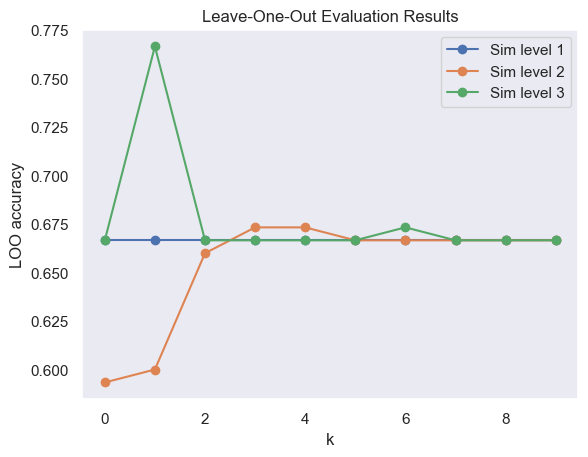

In [11]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}\n")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## Test penguins

In [12]:
penguins = load_penguins()
penguins

# Encode
le = LabelEncoder()
le.fit(penguins['island'])
penguins['island'] = le.transform(penguins['island'])

le.fit(penguins['sex'])
penguins['sex'] = le.transform(penguins['sex'])

le.fit(penguins['species'])
penguins['species'] = le.transform(penguins['species'])

# Remove missing values
penguins = penguins.dropna()  # remove rows with missing values
X = penguins.drop(columns='species')  # features
y = penguins['species']  # target

# Turn into array
X = np.array(X)
y = np.array(y)

In [13]:
# Hyperparameters
dim = X.shape[1]  # number of features
nb_classes = len(np.unique(y))  # number of classes

# Normalize data
data_norm = batch_norm(X)
data_labels = sync_lst_to_float_lst(y)
print(f"Normalized data: {data_norm.shape[0]} samples in {data_norm.shape[1]}D space.")

Normalized data: 342 samples in 7D space.


Leave one out avec k = 1
SimLevel1: 0.5321637426900585
SimLevel2: 0.5818713450292398
SimLevel3: 0.4824561403508772
Result in 221.0498 seconds.

Leave one out avec k = 2
SimLevel1: 0.6695906432748538
SimLevel2: 0.5964912280701754
SimLevel3: 0.695906432748538
Result in 215.7454 seconds.

Leave one out avec k = 3
SimLevel1: 0.4327485380116959
SimLevel2: 0.52046783625731
SimLevel3: 0.5058479532163743
Result in 216.6631 seconds.

Leave one out avec k = 4
SimLevel1: 0.5175438596491229
SimLevel2: 0.4678362573099415
SimLevel3: 0.6140350877192983
Result in 212.4999 seconds.

Leave one out avec k = 5
SimLevel1: 0.5672514619883041
SimLevel2: 0.4327485380116959
SimLevel3: 0.6432748538011696
Result in 213.0915 seconds.

Leave one out avec k = 6
SimLevel1: 0.6140350877192983
SimLevel2: 0.41228070175438597
SimLevel3: 0.6842105263157895
Result in 225.5965 seconds.

Leave one out avec k = 7
SimLevel1: 0.4678362573099415
SimLevel2: 0.39473684210526316
SimLevel3: 0.4766081871345029
Result in 221.6927 sec

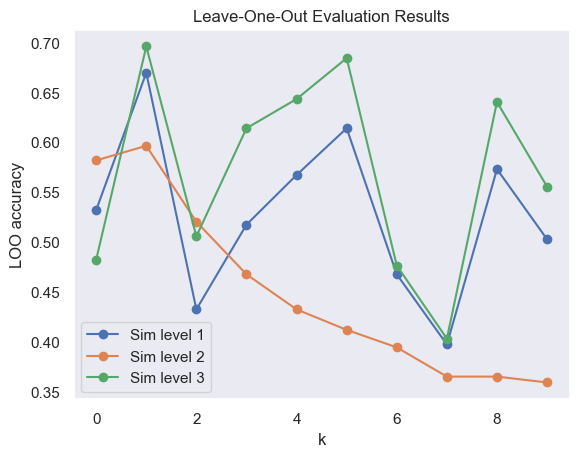

In [14]:
# LOO evaluation
# Define list for each sim level
l1 = []
l2 = []
l3 = []
k = 10

for k in range(1, k+1): 
    tic = time.time()
    mu = generate_capacity(enumerate_permute_unit(data_norm[0]))

    print(f"Leave one out avec k = {k}")
    
    # SimLevel1
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S1), 
            DS = (data_norm, data_labels)
        )
    l1.append(res)
    print(f"SimLevel1: {res}")
    # Sim level 2
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S2), 
            DS = (data_norm, data_labels)
        )
    l2.append(res)
    print(f"SimLevel2: {res}")

    # Sim level 3
    res = leave_one_out(
            C = KNNFuzz(input_dimension=data_norm.shape[1],mu=mu, k=k, sim=S3), 
            DS = (data_norm, data_labels)
        )
    l3.append(res)
    print(f"SimLevel3: {res}")

    toc = time.time()
    print(f"Result in {(toc-tic):0.4f} seconds.\n")

# Plot results
plt.plot(l1, label="Sim level 1", marker='o')
plt.plot(l2, label="Sim level 2", marker='o')
plt.plot(l3, label="Sim level 3", marker='o')

# Config additional params
plt.ylabel("LOO accuracy")
plt.xlabel("k")
plt.title("Leave-One-Out Evaluation Results")
plt.grid()
plt.legend()

## PySwarms

In [ ]:
# Example parameters
n_particles = 30
dimensions = data.shape[1]  # number of features
options = {
    'c1': 0.5,    # cognitive parameter
    'c2': 0.3,    # social parameter
    'w': 0.9      # inertia parameter
}
pso_type = "global"  # or "local" for local best PSO

# Load your data and labels here
# Example:
# data = np.load('your_data.npy')
# labels = np.load('your_labels.npy')

knn = KNNFuzz(input_dimension=dimensions, mu=generate_capacity(enumerate_permute_unit(data[0])), k=5, sim=S1)

# Create PSO optimizer
pso = PSO(n_particles, dimensions, options, (data, labels), knn, pso_type)

# Run optimization
best_cost, best_mu = pso.optimize(fitness_function, n_iters=100)

# Apply softmax to the best result to get the final capacity values
final_capacity = softmax(best_mu)

print(f"Best cost: {-best_cost}")  # Convert back to accuracy
print(f"Best capacity parameters: {final_capacity}")

# Generate final capacity from the optimized parameters
final_capacity_obj = generate_capacity(enumerate_permute_unit(final_capacity))

tmp = []
for i in range(len(final_capacity_obj)):
    print(f"Class {i}: {final_capacity_obj[i].mu}")
    tmp.append(final_capacity_obj[i].mu)

print(f"Final capacity: {tmp}")

2025-05-09 14:42:33,750 - pyswarms.single.global_best - INFO - Optimize for 100 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:  21%|██        |21/100, best_cost=-0.33